## To identify the wine type based on the wine measurements

In [1]:
# Importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

SEED = 42
np.random.seed(SEED)

### Loading the Data
We are loading the diabetes dataset directly from scikit-learn toy dataset library

In [2]:
# Load the dataset
df_data = datasets.load_wine()
class_names = df_data.target_names
df = pd.DataFrame(df_data.data, columns=df_data.feature_names)  # Inputs/Indep variables
df['class'] = df_data.target

### Step 1: Initlal EDA & Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

### Step 2: EDA & Data Preprocessing
* What values do you see?
* What distributions do you see?
* What relationships do you see?
* What relationships do you think might benefit the prediction problem?
* What ideas about the domain does the data spark?

In [4]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [7]:
# Get an overall sense of the data shape with the mean/median, min, max, q1, q3 values
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
# Look for cells with missing data (i.e. Null or NA)
df.isna().any().any()
# count the number of missing data for each feature
# df_na = df.isna().sum()
# df_na
# this will show only features that have nonzero missing values
# df_na[df_na!=0]

False

In [9]:
# limit to categorical data using df.select_dtypes()
# df_cat = df.select_dtypes(include=['object'])
# df_cat.nunique()

In [10]:
# limit to numerical data using df.select_dtypes()
df_num = df.select_dtypes(include=['number'])
df_num.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
class                             3
dtype: int64

In [11]:
# look at correlations in the numerical independent variables, as well as the dependent variable
df_num.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [12]:
# As this is a classification exercise, we will check whether the target (dependent variable) is imbalanced
# df['class'].value_counts()

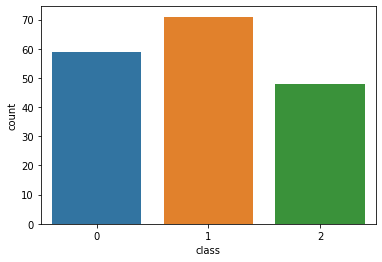

In [13]:
# To visualize how well balanced the target (dependent variable) is
_ = sns.countplot(x=df['class'])

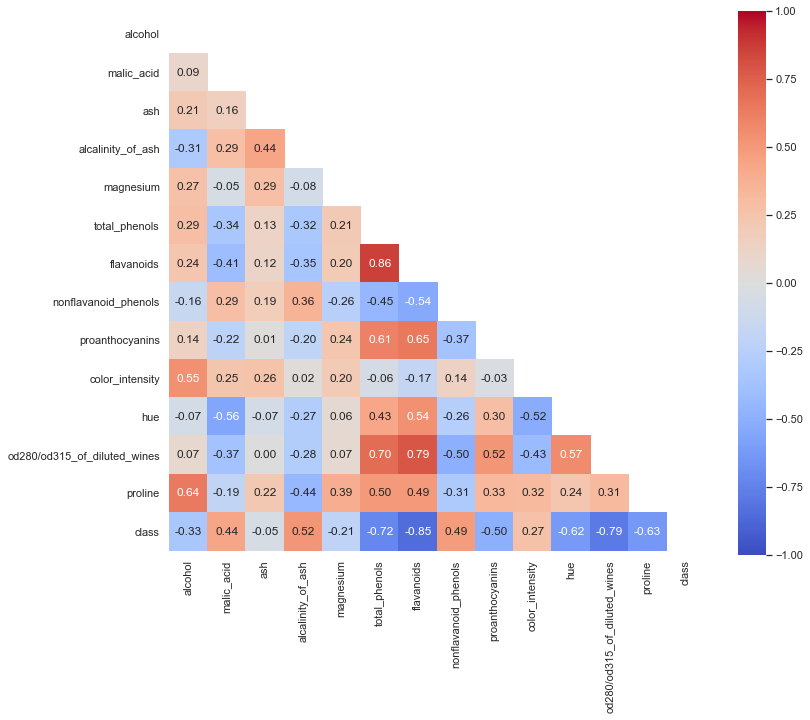

In [14]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(12,10))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label

# _ = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, square=True, 
#                 cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')

# Prevent Heatmap Cut-Off Issue
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

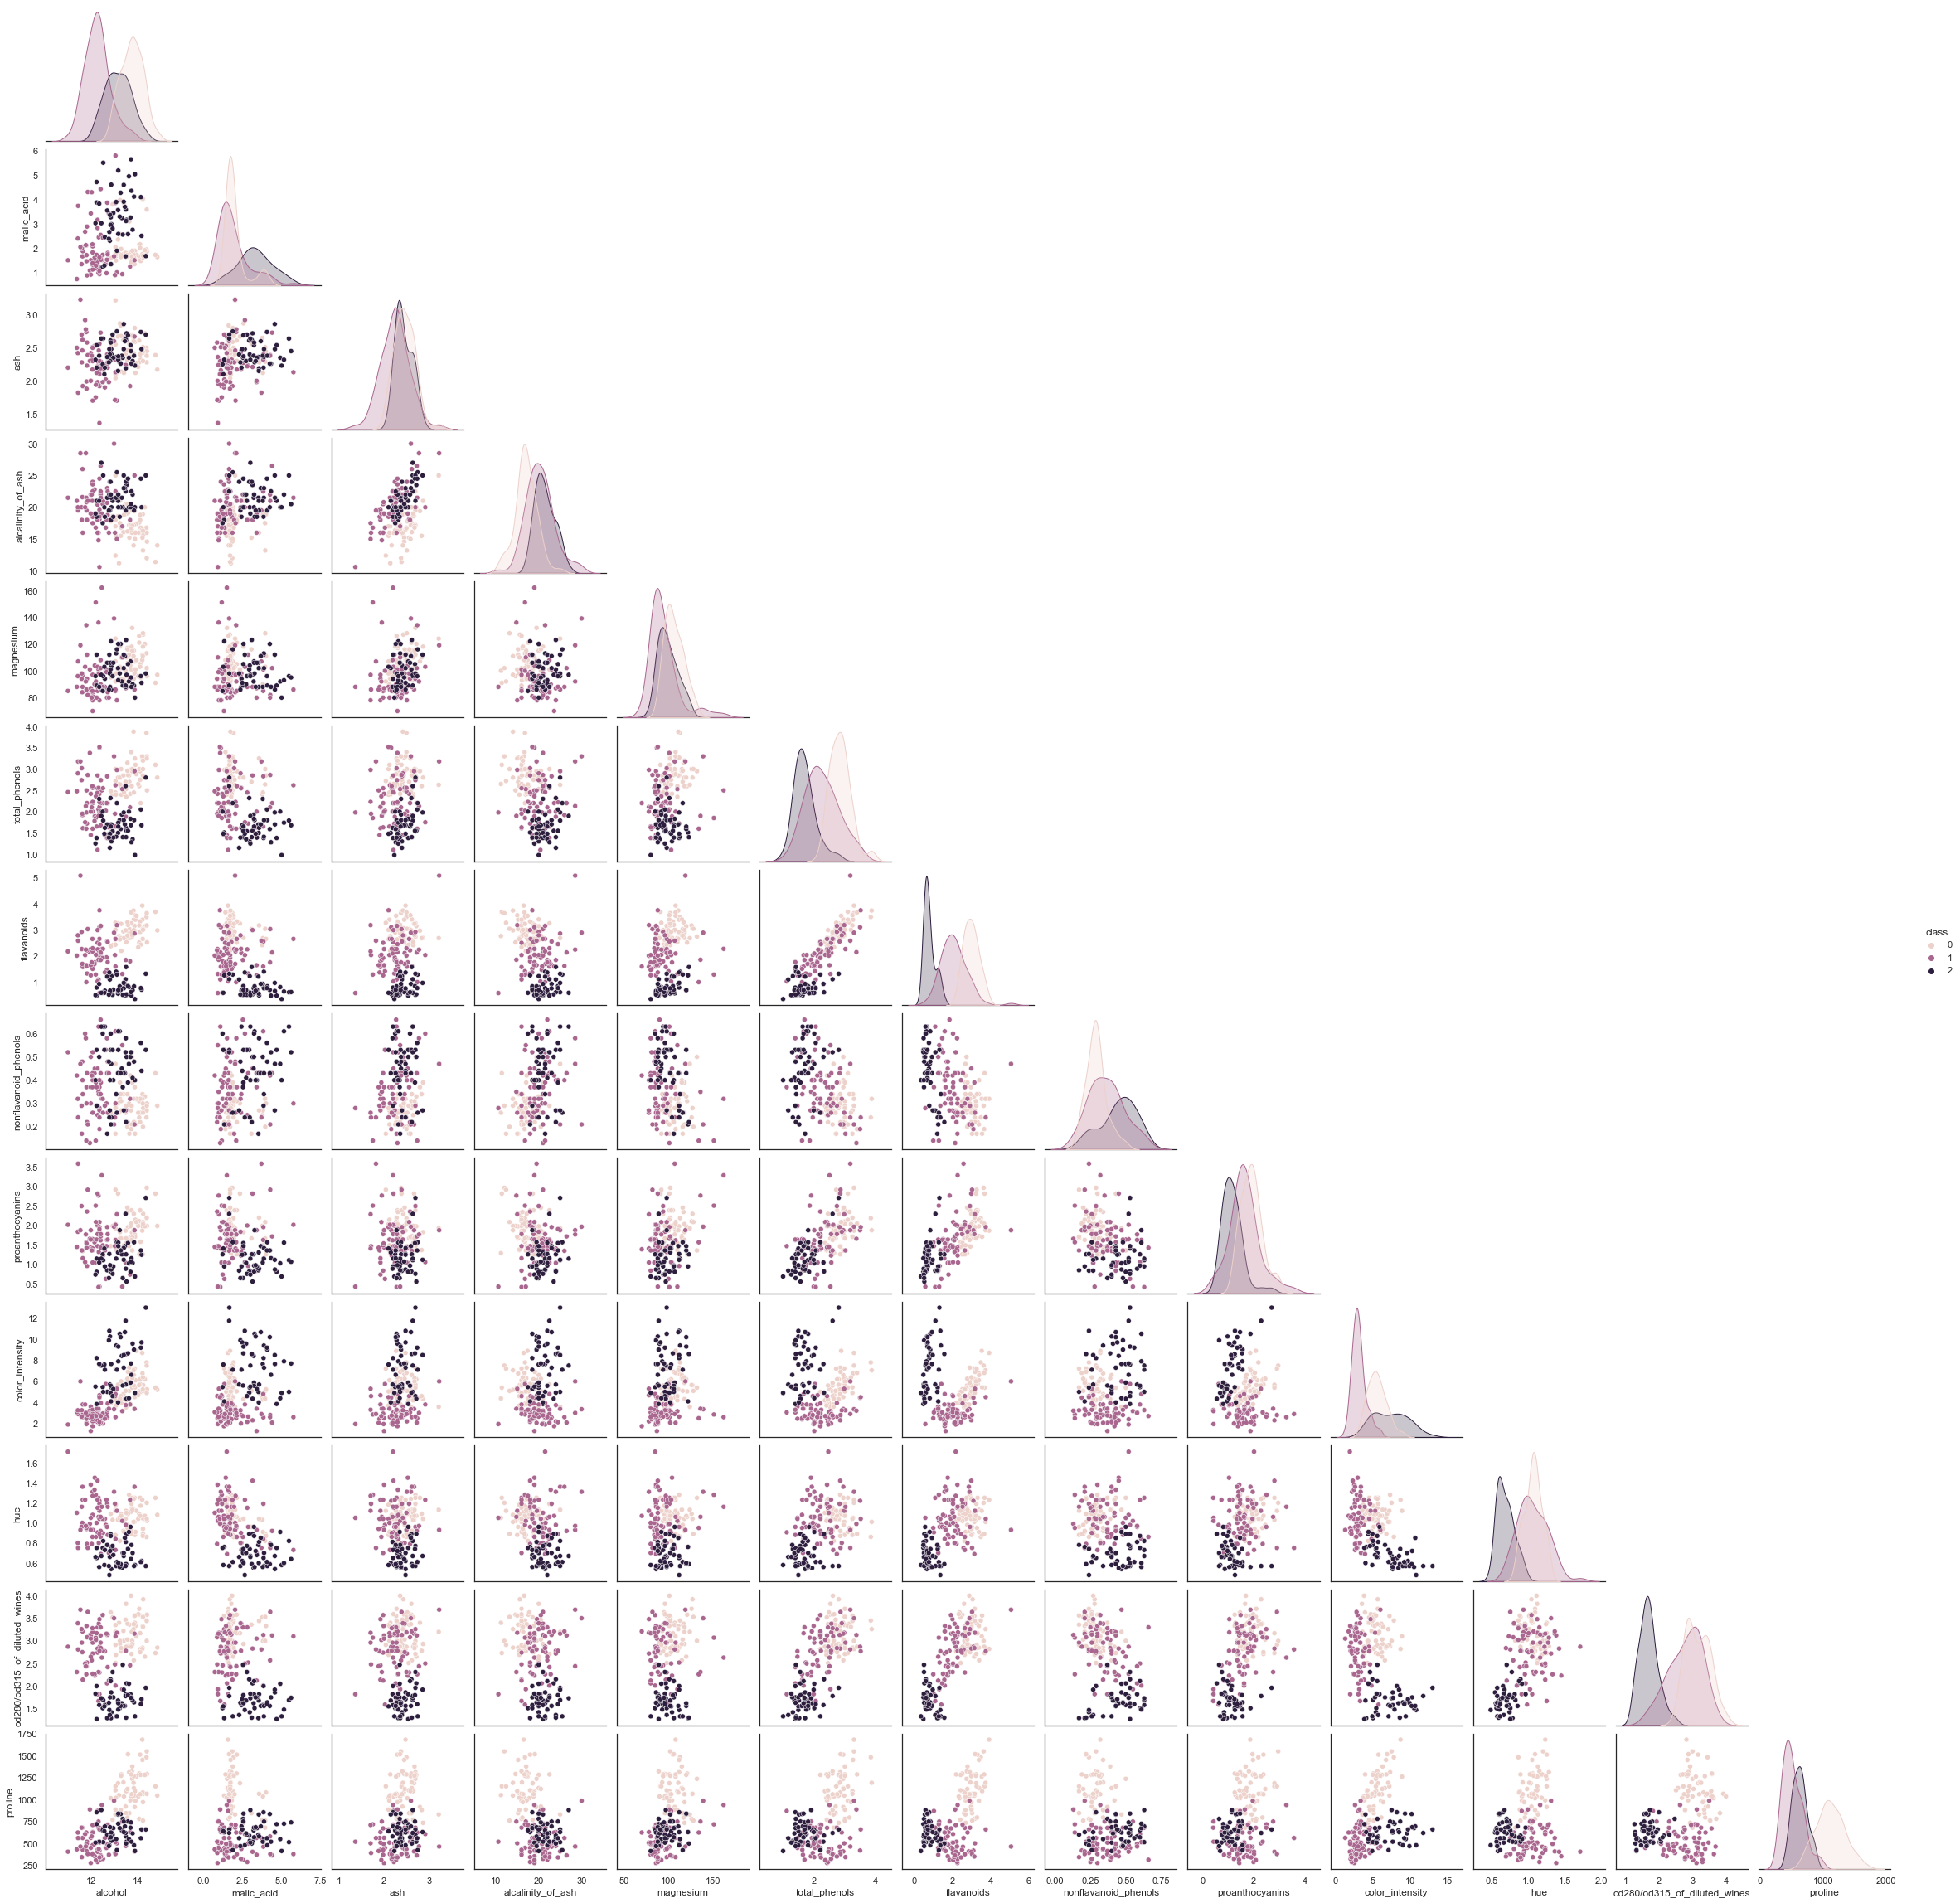

In [15]:
# Visualize correlations drilled down by dependent variable
_ = sns.pairplot(df, corner=True, hue='class')

### Step 3: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [16]:
# 1)

X = df.drop(['class'], axis=1) # input
y = df['class'] # output (dependent variable)

In [17]:
# 2) Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)

### Step 4: Training the model

In [18]:
# Import the K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# Import the K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 20)
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []

# Training multiple models to find K that returns the best results
for k in kVals:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    
    train_score = classifier.score(X_train, y_train)
    train_f1score = f1_score(y_train, classifier.predict(X_train), average='macro')
    test_score = classifier.score(X_test, y_test)
    test_f1score = f1_score(y_test, classifier.predict(X_test), average='macro')
    
    train_accuracies.append(train_score)
    train_f1_scores.append(train_f1score)
    
    test_accuracies.append(test_score)
    test_f1_scores.append(test_f1score)
    
    print("K = {}, Training (acc:{:.0%}, f1:{:.0%}), Testing (acc:{:.0%}, f1:{:.0%})"\
          .format(k, train_score, train_f1score, test_score, test_f1score))

K = 1, Training (acc:100%, f1:100%), Testing (acc:78%, f1:77%)
K = 2, Training (acc:86%, f1:84%), Testing (acc:75%, f1:72%)
K = 3, Training (acc:82%, f1:82%), Testing (acc:75%, f1:74%)
K = 4, Training (acc:76%, f1:74%), Testing (acc:72%, f1:71%)
K = 5, Training (acc:78%, f1:77%), Testing (acc:81%, f1:80%)
K = 6, Training (acc:77%, f1:75%), Testing (acc:75%, f1:74%)
K = 7, Training (acc:79%, f1:77%), Testing (acc:72%, f1:72%)
K = 8, Training (acc:79%, f1:78%), Testing (acc:75%, f1:73%)
K = 9, Training (acc:77%, f1:76%), Testing (acc:81%, f1:80%)
K = 10, Training (acc:74%, f1:73%), Testing (acc:83%, f1:83%)
K = 11, Training (acc:73%, f1:72%), Testing (acc:81%, f1:80%)
K = 12, Training (acc:72%, f1:71%), Testing (acc:78%, f1:77%)
K = 13, Training (acc:74%, f1:73%), Testing (acc:81%, f1:80%)
K = 14, Training (acc:72%, f1:71%), Testing (acc:78%, f1:77%)
K = 15, Training (acc:73%, f1:72%), Testing (acc:81%, f1:80%)
K = 16, Training (acc:72%, f1:71%), Testing (acc:81%, f1:80%)
K = 17, Trainin

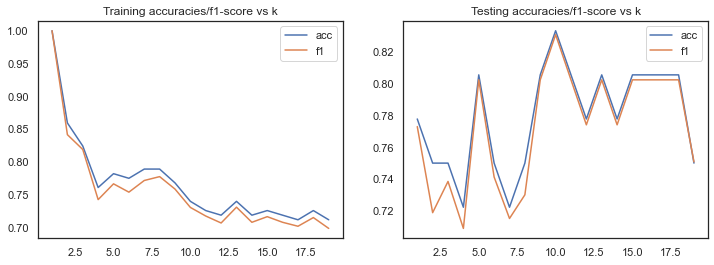

In [20]:
# Plot two charts:
# 1. Training accuracies and F1-Score versus K
# 2. Testing accuracies and F1-Score versus K
plt.subplots(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(kVals, train_accuracies)
plt.plot(kVals, train_f1_scores)
plt.title('Training accuracies/f1-score vs k')
plt.legend(['acc', 'f1'])

plt.subplot(1,2,2)
plt.plot(kVals, test_accuracies)
plt.plot(kVals, test_f1_scores)
plt.title('Testing accuracies/f1-score vs k')
plt.legend(['acc', 'f1'])

In [30]:
i = int(np.argmax(test_accuracies))
print("Best 'Testing Accuracy = {:.2%}' with 'K = {}'".format(test_accuracies[i], i+1))
j = int(np.argmax(test_f1_scores))
print("Best 'Testing F1-score = {:.2%}' with 'K = {}'".format(test_f1_scores[j], j+1))

Best 'Testing Accuracy = 83.33%' with 'K = 10'
Best 'Testing F1-score = 83.09%' with 'K = 10'


In [22]:
# We now train our final model using K that returned with the best results
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### Step 5: Testing the model

In [23]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [24]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
10,0,0
134,2,2
28,0,0
121,1,1
62,1,2
51,0,0
7,0,0
66,1,1
129,1,2
166,2,2


### Step 6: Evaluate the model

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred, target_names=class_names.tolist()))
print()

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification report:

              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.64      0.78        14
     class_2       0.64      0.90      0.75        10

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36


Confusion Matrix:


array([[12,  0,  0],
       [ 0,  9,  5],
       [ 1,  0,  9]], dtype=int64)

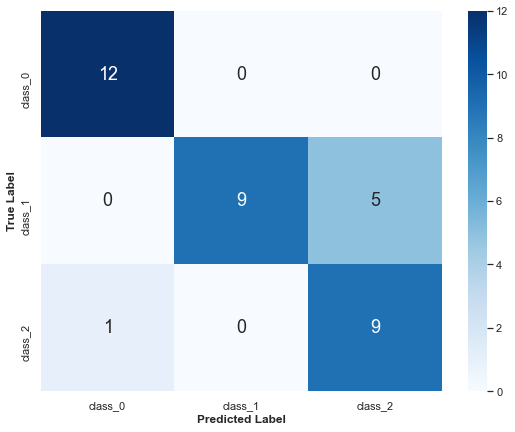

In [26]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,
                xticklabels=class_names, yticklabels=class_names)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [27]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:20]

,Desired Output (Actuals),Predicted Output
62,1,2
129,1,2
60,1,2
98,1,2
112,1,2
176,2,0


### Step 7: My own prediction using one of the observations from X_test

In [28]:
# Choose a random row from X_test
my_features = X_test.iloc[np.random.randint(0, len(X_test))]
own_pred = classifier.predict(my_features.to_numpy().reshape(1,-1))
print("My prediction is a {}.".format(class_names[own_pred[0]]))
print("This was the input data:")
print(my_features)

My prediction is a class_2.
This was the input data:
alcohol                          11.76
malic_acid                        2.68
ash                               2.92
alcalinity_of_ash                20.00
magnesium                       103.00
total_phenols                     1.75
flavanoids                        2.03
nonflavanoid_phenols              0.60
proanthocyanins                   1.05
color_intensity                   3.80
hue                               1.23
od280/od315_of_diluted_wines      2.50
proline                         607.00
Name: 112, dtype: float64


## Exercise: To Identify digital numbers from scanned images

In [29]:
# Load the dataset
df_data = datasets.load_digits()
class_names = df_data.target_names
df = pd.DataFrame(df_data.data, columns=df_data.feature_names)  # Inputs/Indep variables
df['class'] = df_data.target

### Step 1: Initial EDA & Data Preparation

### Step 2: EDA & Data Preprocessing

### Step 3: Preparing the data for training and testing

### Step 4: Training the model

### Step 5: Testing the model

### Step 6: Evaluate the model

### Step 7: My own predictions